# Importing essential libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Generate two class dataset

In [2]:
X, y = make_classification(n_samples=1000, n_classes=2, n_features=20, random_state=27)

# Split into train-test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=27)

# Train models

In [4]:
model = LogisticRegression()

# Fit model (Normalization and Scaling)

In [5]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Predict probabilities

In [6]:
pred_prob = model.predict_proba(X_test)

# AUC_ROC curve for models

In [7]:
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# AUC Score

In [8]:
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print("AUC score = ", auc_score)

AUC score =  0.9761029411764707


# Plot AUC_ROC curve

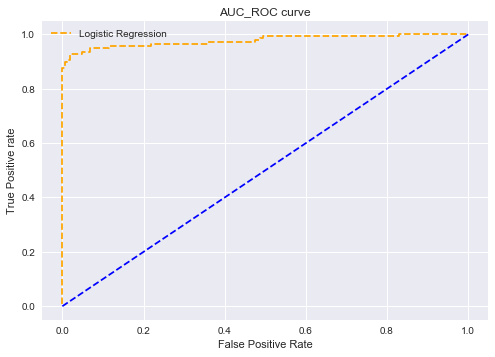

In [10]:
plt.style.use('seaborn')


plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')

# title
plt.title('AUC_ROC curve')

# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();